In [13]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

def compare_submissions(base_file, new_file):
    """
    Compares two submission files by calculating the correlation and RMSE
    for their prediction columns (Y1 and Y2).

    Args:
        base_file (str): Filepath for the baseline submission (e.g., 'submission_0.64.csv').
        new_file (str): Filepath for the new submission to be checked.
    """
    try:
        # Read the submission files
        base_df = pd.read_csv(base_file)
        new_df = pd.read_csv(new_file)

        print(f"Comparing '{new_file}' with base file '{base_file}':\n")

        # --- Compare Y1 columns ---
        # Calculate Pearson Correlation
        corr_y1 = base_df['Y1'].corr(new_df['Y1'])
        # Calculate Root Mean Squared Error (RMSE)
        rmse_y1 = np.sqrt(mean_squared_error(base_df['Y1'], new_df['Y1']))

        print(f"--- Target Y1 ---")
        print(f"Correlation: {corr_y1:.6f}")
        print(f"RMSE:        {rmse_y1:.6f}\n")

        # --- Compare Y2 columns ---
        # Calculate Pearson Correlation
        corr_y2 = base_df['Y2'].corr(new_df['Y2'])
        # Calculate Root Mean Squared Error (RMSE)
        rmse_y2 = np.sqrt(mean_squared_error(base_df['Y2'], new_df['Y2']))

        print(f"--- Target Y2 ---")
        print(f"Correlation: {corr_y2:.6f}")
        print(f"RMSE:        {rmse_y2:.6f}")

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure file paths are correct.")
    except KeyError as e:
        print(f"Error: Column {e} not found. Ensure both files have 'Y1' and 'Y2' columns.")


In [38]:
baseline_submission = 'preds_xgb_time.csv'
new_submission = 'submission_final_fr.csv'

compare_submissions(baseline_submission, new_submission)

Comparing 'submission_final_fr.csv' with base file 'preds_xgb_time.csv':

--- Target Y1 ---
Correlation: 0.990133
RMSE:        0.122942

--- Target Y2 ---
Correlation: 0.979956
RMSE:        0.178454


Plotting results from preds_xgb_time.csv


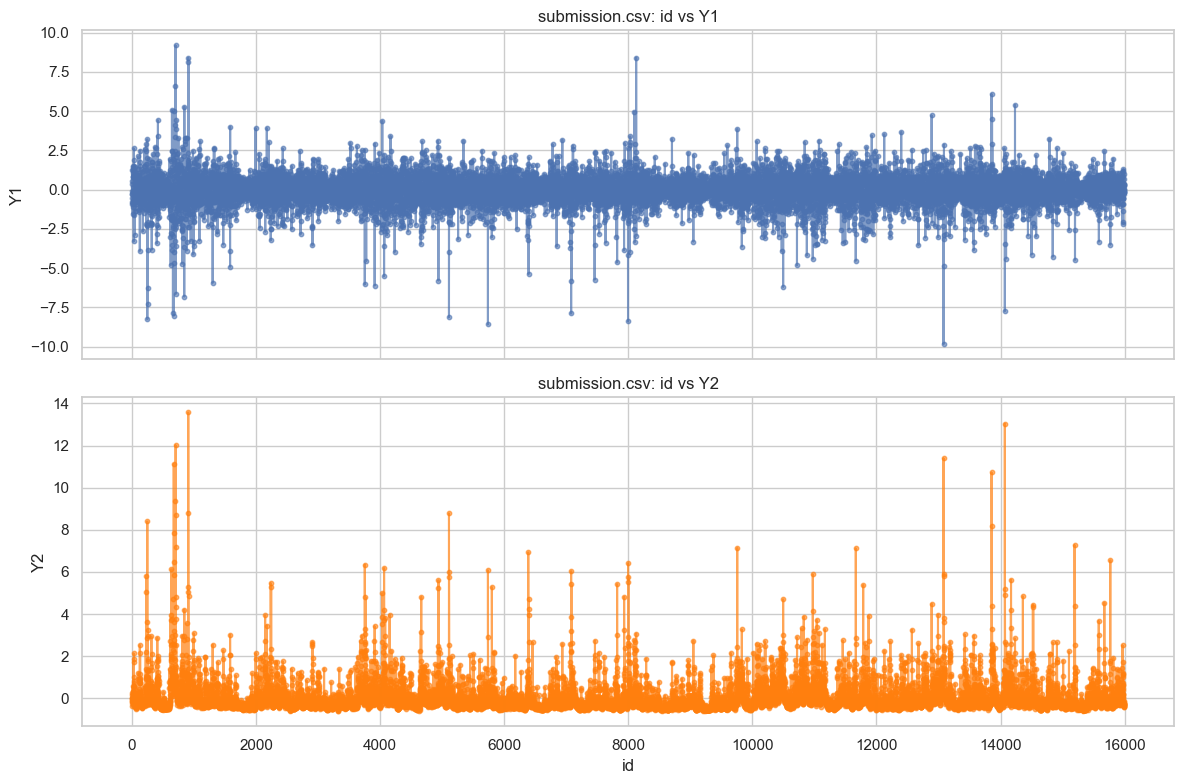

Plotting results from submission_final_fr.csv


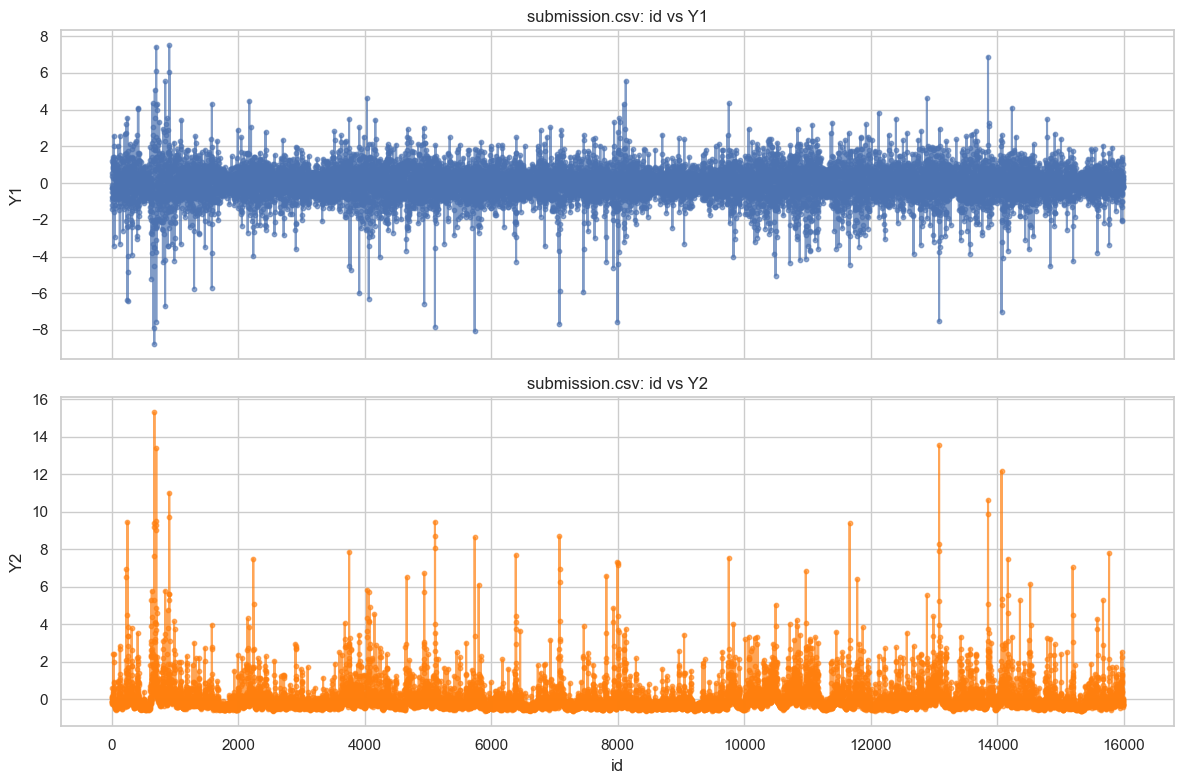

In [39]:
# Simple submission plots: id vs Y1 and id vs Y2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
for sub in [baseline_submission, new_submission]:
    print(f"Plotting results from {sub}")
    sub = pd.read_csv(sub)

    # If 'id' exists use it, else assume 1-indexed ordering
    if 'id' not in sub.columns:
        sub = sub.copy()
        sub.insert(0, 'id', range(1, len(sub) + 1))

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Y1
    if 'Y1' in sub.columns:
        axes[0].plot(sub['id'], sub['Y1'], '-', alpha=0.7, label='Y1 (line)')
        axes[0].scatter(sub['id'], sub['Y1'], s=10, alpha=0.6)
        axes[0].set_ylabel('Y1')
        axes[0].set_title('submission.csv: id vs Y1')
    else:
        axes[0].text(0.5, 0.5, 'Y1 not found in submission.csv', ha='center')

    # Y2
    if 'Y2' in sub.columns:
        axes[1].plot(sub['id'], sub['Y2'], '-', alpha=0.7, color='tab:orange', label='Y2 (line)')
        axes[1].scatter(sub['id'], sub['Y2'], s=10, alpha=0.6, color='tab:orange')
        axes[1].set_xlabel('id')
        axes[1].set_ylabel('Y2')
        axes[1].set_title('submission.csv: id vs Y2')
    else:
        axes[1].text(0.5, 0.5, 'Y2 not found in submission.csv', ha='center')

    plt.tight_layout()
    plt.show()

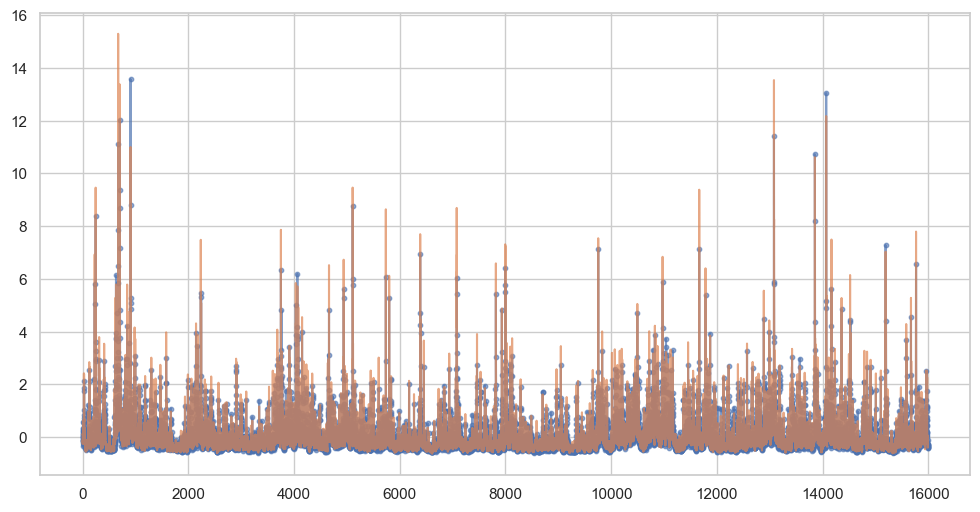

In [40]:
# Graph the y2 predictions on top of each other
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sub1 = pd.read_csv(baseline_submission)
sub2 = pd.read_csv(new_submission)
plt.figure(figsize=(12, 6))
plt.plot(sub1['id'], sub1['Y2'], label='Baseline Submission', alpha=0.7)
plt.plot(sub2['id'], sub2['Y2'], label='New Submission', alpha=0.7)
plt.scatter(sub1['id'], sub1['Y2'], s=10, alpha=0.6)

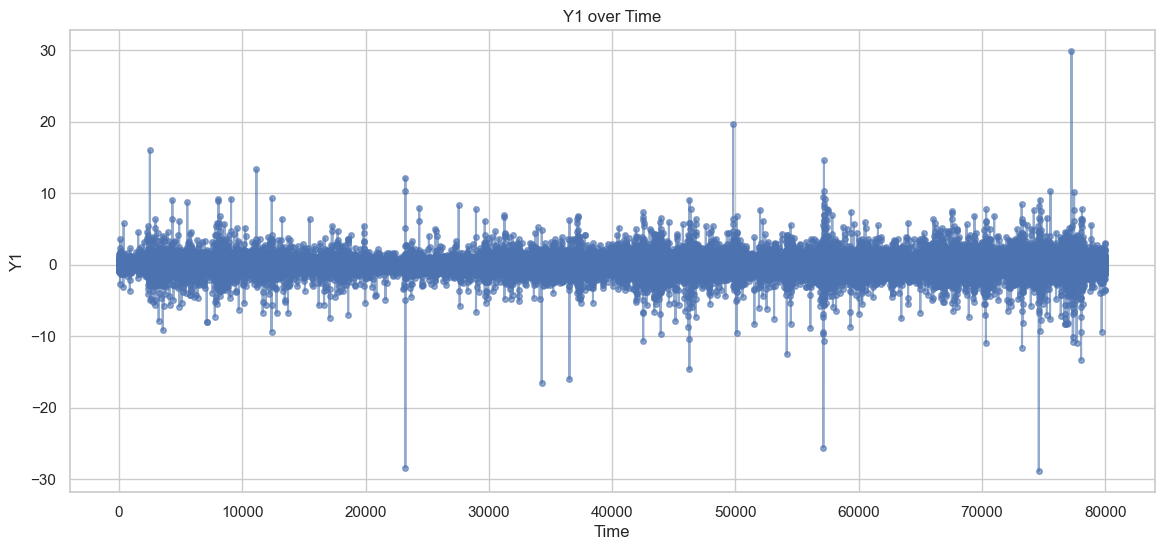

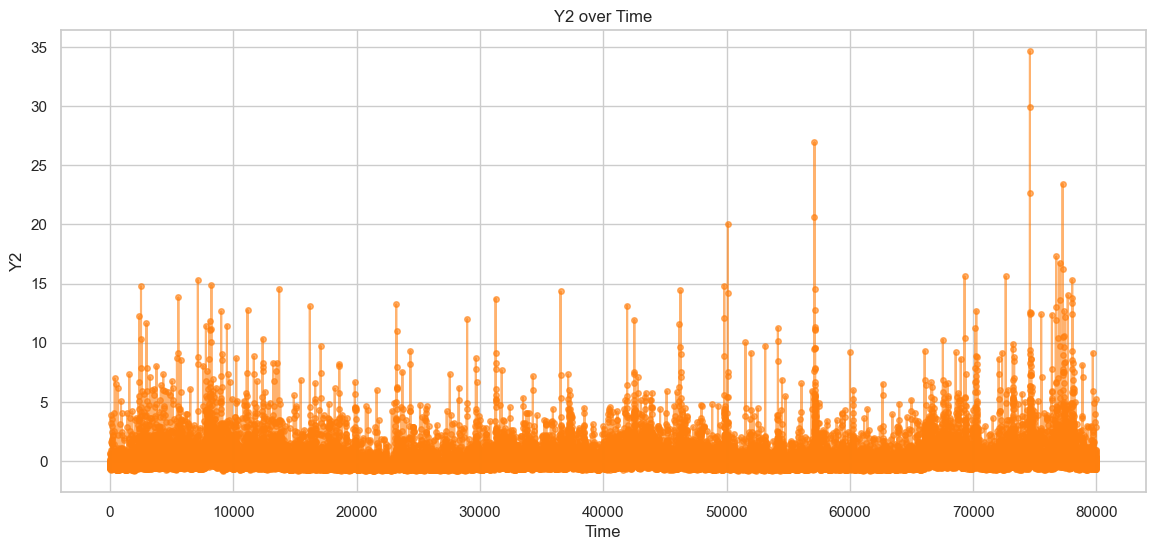

In [1]:
# Plot Y1 vs time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

data = pd.read_csv('data/train.csv')
plt.figure(figsize=(14, 6))
plt.plot(data['time'], data['Y1'], marker='o', linestyle='-', markersize=4, alpha=0.6)
plt.title('Y1 over Time')
plt.xlabel('Time')
plt.ylabel('Y1')
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(data['time'], data['Y2'], marker='o', linestyle='-', markersize=4, alpha=0.6, color='tab:orange')
plt.title('Y2 over Time')
plt.xlabel('Time')
plt.ylabel('Y2')
plt.show()